In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Dataset/phishing_site_urls.csv')

In [3]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [4]:
df.shape

(549346, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [6]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [7]:
df.Label.value_counts()

Label
good    392924
bad     156422
Name: count, dtype: int64

In [8]:
! pip install nltk

In [9]:
from nltk.tokenize import RegexpTokenizer

In [10]:
tokenizer=RegexpTokenizer(r'[A-Za-z]+')

In [11]:
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [12]:
tokenizer.tokenize(df.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [13]:
df['text_tokenized']=df.URL.map(lambda t:tokenizer.tokenize(t))

In [14]:
df.head()

,URL,Label,text_tokenized
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [15]:
from nltk.stem.snowball import SnowballStemmer

In [16]:
stemmer=SnowballStemmer('english')

In [17]:
df['text_stemmed']=df['text_tokenized'].map(lambda l:[stemmer.stem(word) for word in l])

In [18]:
df.head()

,URL,Label,text_tokenized,text_stemmed
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide..."


In [19]:
df['text']=df['text_stemmed'].map(lambda l:' '.join(l))

In [20]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [21]:
good_sites=df[df.Label=='good']
bad_sites=df[df.Label=='bad']

In [22]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [23]:
def plot_wordcloud(text,mask=None,max_words=400,max_font_size=120,figure_size=(24.0,16.0),title=None,title_size=40,image_colour=False):
    stopwords=set(STOPWORDS)
    more_stopwords={'com','http'}
    stopwords=stopwords.union(more_stopwords)
    wordcloud=wordCloud(background_colour='white',stopwords=stopwords,max_words=max_words,max_font_size=max_font_size,random_state=42,mask=mask)
    wordcloud.generate(text)
    plt.figure(figsize=figure_size)
    if image_colour:
        image_colours=ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors),interpolations="bilinear");
        plt.title(title,fontdict={'size':title_size,'verticalalignment':'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title,fontdict={'size':title_size,'color':'green','verticalalignment':'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [24]:
all_text=' '.join(good_sites['text'].tolist())

In [25]:
from wordcloud import WordCloud

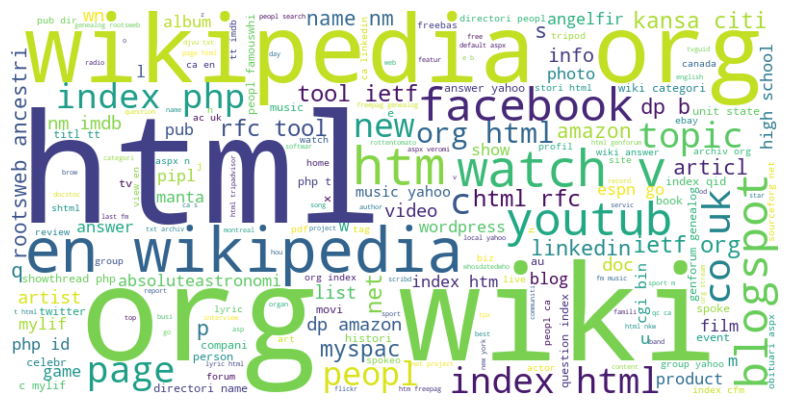

In [26]:
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
all_text=' '.join(bad_sites['text'].tolist())

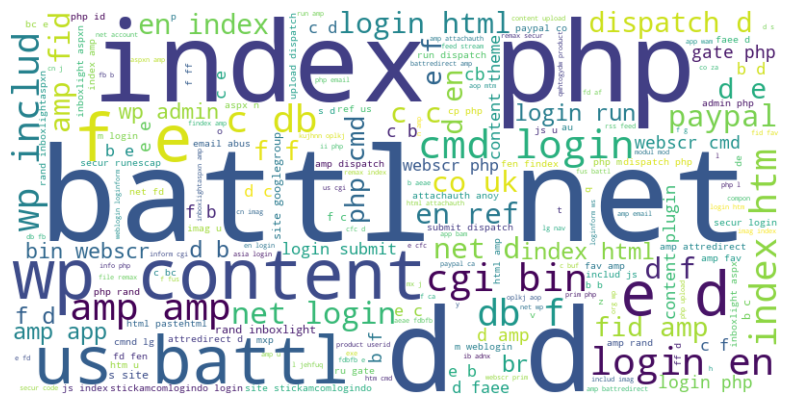

In [28]:
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cv=CountVectorizer()

In [32]:
features=cv.fit_transform(df.text)

In [33]:
features[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(features,df.Label)

Model Trainning

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
l_model=LogisticRegression()

In [38]:
l_model.fit(x_train,y_train)

C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
l_model.score(x_test,y_test)

0.9626757538026898

In [40]:
l_model.score(x_train,y_train)

0.9776072852777488

In [41]:
from sklearn.metrics import classification_report

In [42]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(l_model.predict(x_test),y_test,target_names=['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.96      0.93     36371
        Good       0.99      0.96      0.97    100966

    accuracy                           0.96    137337
   macro avg       0.94      0.96      0.95    137337
weighted avg       0.96      0.96      0.96    137337



In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
con_mat=pd.DataFrame(confusion_matrix(l_model.predict(x_test),y_test),
                    columns=['Predicted:Bad','Predicted:Good'],
                    index=['Actual:Bad','Actual:Good'])

In [45]:
import seaborn as sns


CONFUSION MATRIX


<Axes: >

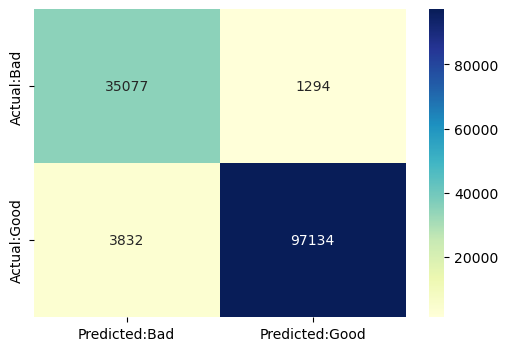

In [46]:
print('\nCONFUSION MATRIX')
plt.figure(figsize=(6,4))
sns.heatmap(con_mat,annot=True,fmt='d',cmap="YlGnBu")

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
mnb=MultinomialNB()

In [49]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [50]:
mnb.score(x_test,y_test)

0.9573749244559004

Save Model

In [51]:
import pickle

In [52]:
pickle.dump(l_model,open('phishing.pkl','wb'))

In [78]:
pickle.dump(mnb,open('phishing_mnb.pkl','wb'))

In [79]:
pickle.dump(cv,open('vectorizer.pkl','wb'))

In [55]:
predict_bad=['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','www.tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good=['www.youtube.com/','youtube.com/watch?v=qI0TQJI3vdu','www.retailhellunderground.com/','restorevisioncenters.com/html/technology.html']

In [56]:
predict_good=cv.transform(predict_good)

In [57]:
predict_bad=cv.transform(predict_bad)

In [58]:
l_model.predict(predict_good)

array(['good', 'good', 'good', 'good'], dtype=object)

In [59]:
mnb.predict(predict_bad)

array(['bad', 'bad', 'bad', 'good'], dtype='<U4')

In [65]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(df["Label"])   # "bad" -> 0, "good" -> 1 (or vice versa)

print(le.classes_)   # ['bad' 'good']
print(y[:10])        # Example encoded values


['bad' 'good']
[0 0 0 0 0 0 0 0 0 0]


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Encode target
le = LabelEncoder()
y = le.fit_transform(df["Label"])  # good/bad → 0/1

# Convert text into numeric features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  
X_text = vectorizer.fit_transform(df["text"])

# Use TF-IDF features instead of raw text
X = X_text  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
xgb = XGBClassifier(eval_metric="logloss")
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.9154637298625649


In [81]:
import pickle

# Save model
with open("phishing_modeeel.pkl", "wb") as f:
    pickle.dump(xgb, f)

# Save vectorizer
with open("vectorizeeer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
